In [46]:
import numpy as np

# Hideen Markov Model

一个隐马尔科夫模型$\lambda$由5元组组成：  
1. 隐状态转移概率矩阵A
2. 某隐状态出现各可观测元素的概率矩阵B
3. 初始状态概率分布Pi
4. 隐状态集合Q
5. 可观测元素集合V

**问题1：已知马尔卡夫模型，求某序列出现的概率$P(O|\lambda)$**

In [47]:
# 问题模型-盒子与球模型
A = [
    [0.5, 0.2, 0.3],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
]
B = [
    [0.5, 0.5],
    [0.4, 0.6],
    [0.7, 0.3]
]
Pi = [0.2, 0.4, 0.4]

Q = {1, 2, 3}
V = ["r", "w"]
V_map = {v : V.index(v) for v in V}

A = np.array(A)
B = np.array(B)
Pi = np.array(Pi)
B[:,1]

array([0.5, 0.6, 0.3])

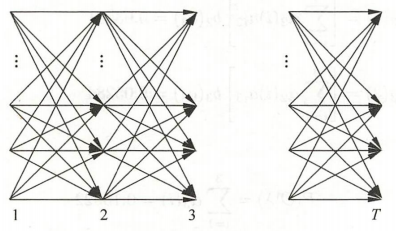
前向算法很像神经网络的计算，每一步的计算是现将上一步的概率乘以转移概率矩阵，得到转移到各隐状态的概率，然后再乘以对应的元素转移概率即可。

In [48]:
# 前向算法
def forward_fun(O):
    # 我们需要记录每一个时刻，不同隐状态出现某元素的概率
    # 计算下一时刻时，则在上一概率的基础上乘以新概率
    
    # 初始值
    forward_p = Pi * B[:, V_map[O[0]]]
    
    if len(O) == 1:
        return forward_p.sum()
    
    for i in range(1, len(O)):
        forward_p = np.matmul(A.T, forward_p) * B[:, V_map[O[i]]]
    
    return forward_p.sum()

forward_fun("rwr")

0.130218

In [49]:
# 后向算法
def backward_fun(O):
    l = len(O)
    backward_p = B[:, V_map[O[l-1]]]
    
    if len(O) == 1:
        backward_p = Pi * backward_p
        return backward_p.sum()
    
    for i in range(l-2, -1, -1):
        backward_p = np.matmul(A, backward_p) * B[:, V_map[O[i]]]
        
    backward_p = Pi * backward_p
    return backward_p.sum()

backward_fun("rwr")

0.130218

In [50]:
# 后向算法2
def backward_fun(O):
    backward_p = np.ones(len(Q))
    
    for i in range(len(O)-2, -1, -1):
        backward_p = np.matmul(A, backward_p * B[:, V_map[O[i+1]]])
        
    backward_p = backward_p * Pi * B[:, V_map[O[0]]]
    return backward_p.sum()

backward_fun("rwr")

0.130218

**前向概率与后向概率**  
前向概率的定义：时刻$t$，状态为$q_i$，前$t$个时刻的观测值为$o_1,o_2,...,o_t$  
后向概率的定义：时刻$t$，状态为$q_i$，$t+1$到结尾T的观测值为$o_{t+1},o_{t+2},...,o_{T}$
可以看到最大的区别就是前向概率包括了此时的输出$o_t$而后向不包括。

In [51]:
def forward_p(t, q_i): # t < len(O), q_i < len(Q)
    p = Pi * B[:, V_map[O[0]]]
    if t == 0:
        return p[q_i]
    else:
        for i in range(1, t+1):
            p = np.matmul(A.T, p) * B[:, V_map[O[i]]]
    
    return p[q_i]

In [52]:
O = "rwr"
forward_p(0, 0)

0.1

In [53]:
def backward_p(t, q_i): # t < len(O), q_i < len(Q)
    p = np.ones(len(Q))
    if t == len(O)-1:
        return p[q_i]
    
    for i in range(len(O)-2, t-1, -1):
        p = np.matmul(A, p * B[:, V_map[O[i+1]]])
        
    return p[q_i]

In [54]:
backward_p(0, 0)

0.24509999999999998

In [55]:
for t in range(3):
    print("对于时刻%d:" % t)
    sum = 0
    for q in range(3):
        p = forward_p(t, q) * backward_p(t, q)
        print("Q_%d的概率为:%f" % (q, p))
        sum += p
    print("和为:%f" % sum)

对于时刻0:
Q_0的概率为:0.024510
Q_1的概率为:0.041952
Q_2的概率为:0.063756
和为:0.130218
对于时刻1:
Q_0的概率为:0.041580
Q_1的概率为:0.054096
Q_2的概率为:0.034542
和为:0.130218
对于时刻2:
Q_0的概率为:0.041870
Q_1的概率为:0.035512
Q_2的概率为:0.052836
和为:0.130218
